In [6]:
import numpy as np
import pandas as pd

import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


In [3]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Изучение датасета 
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3230 entries, 1 to 497
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  3230 non-null   int64  
 1   children     3230 non-null   float64
 2   salary       3230 non-null   float64
 3   sex          3230 non-null   int64  
 4   age          3230 non-null   float64
 5   profession   3230 non-null   object 
 6   home_cost    3230 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    3230 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 252.3+ KB


1. Какие признаки численные?
* `salary`, `children`, `age`, `home_cost`, `happyness`

2. Какие признаки категориальные?
* `was_married`, `sex`, `Profession`, `drive_info`
3. Какие признаки имеют нормальное распределение?
* Для проверки нормальности распределения можно использовать тест Шапиро-Уилка или визуально оценить распределение с помощью гистограммы и Q-Q графика.
Проведем тест Шапиро-Уилка:

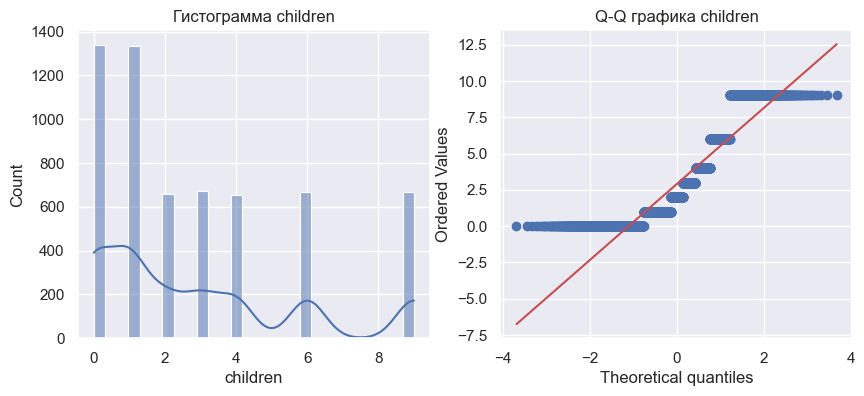

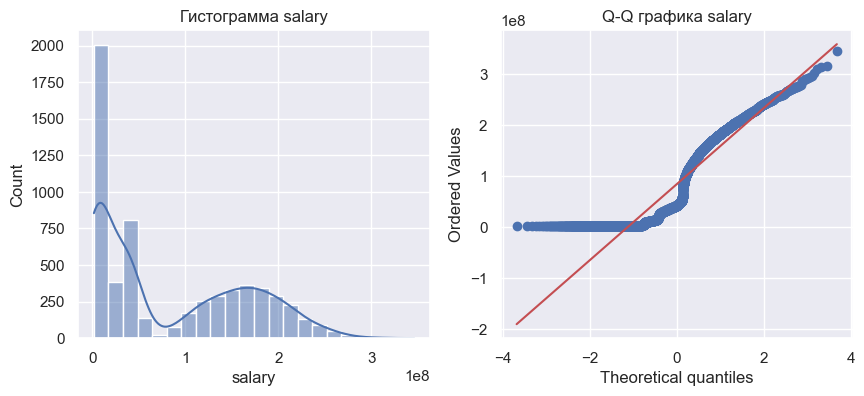

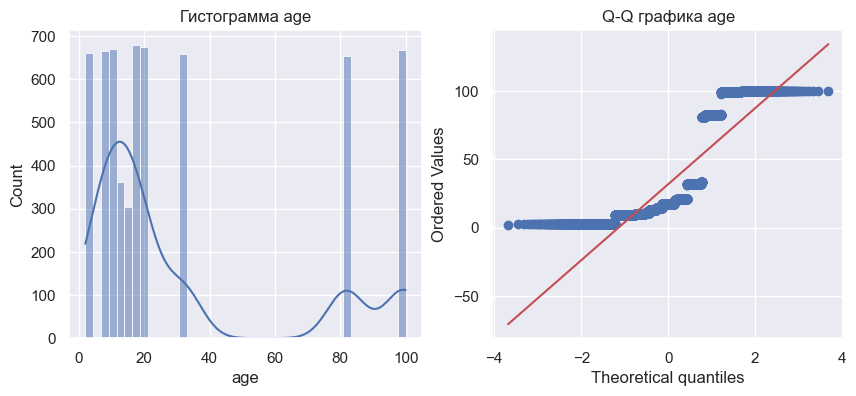

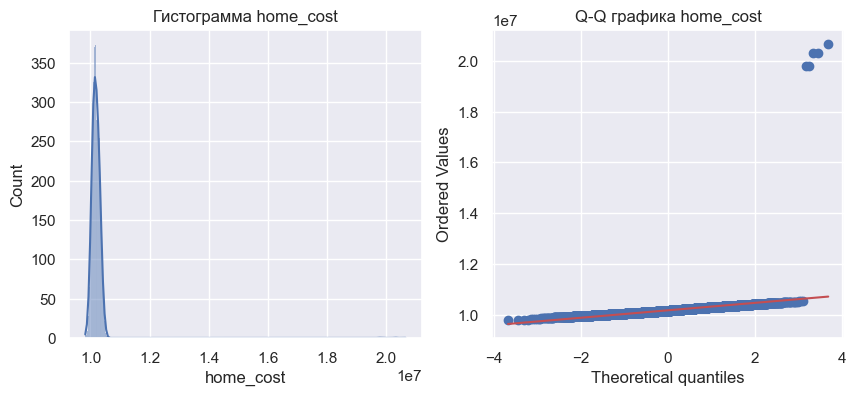

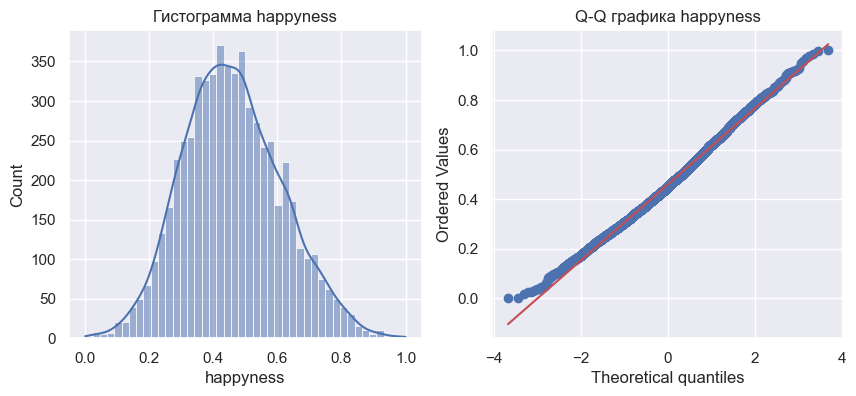

In [31]:
# Визуализация распределений
numeric_features = ['children', 'salary', 'age', 'home_cost', 'happyness']

for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Гистограмма {feature}')
    
    plt.subplot(1, 2, 2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q графика {feature}')
    
    plt.show()


In [33]:
# тест Шапиро-Уилка:
for feature in numeric_features:
    stat, p = stats.shapiro(data[feature])
    print(f'Тест Шапиро-Уилка на |{feature}|: p-value = {p}')

Тест Шапиро-Уилка на |children|: p-value = 1.2599466174547483e-60
Тест Шапиро-Уилка на |salary|: p-value = 2.0172897497199018e-58
Тест Шапиро-Уилка на |age|: p-value = 1.523145340452561e-71
Тест Шапиро-Уилка на |home_cost|: p-value = 8.097600422358611e-95
Тест Шапиро-Уилка на |happyness|: p-value = 1.9492584021765804e-12


C:\Users\s.ibodov\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6000.
  res = hypotest_fun_out(*samples, **kwds)


результаты теста Шапиро-Уилка могут быть неточными для больших выборок, превышающих 5000 наблюдений. В вашем случае, размер выборки составляет 6000 наблюдений. Тест Шапиро-Уилка не всегда точно работает с такими большими данными, и поэтому библиотека SciPy выдает это предупреждение.

Для проверки нормальности распределения в больших выборках можно использовать другие методы, такие как:

Тест Колмогорова-Смирнова (Kolmogorov-Smirnov test)

In [35]:
#теста Колмогорова-Смирнова:
from scipy.stats import kstest

for feature in numeric_features:
    stat, p = kstest(data[feature], 'norm', args=(data[feature].mean(), data[feature].std()))
    print(f'Тест Колмогорова-Смирнова на |{feature}|: p-value = {p}')


Тест Колмогорова-Смирнова на |children|: p-value = 2.7260318549417164e-194
Тест Колмогорова-Смирнова на |salary|: p-value = 8.283888691974906e-226
Тест Колмогорова-Смирнова на |age|: p-value = 0.0
Тест Колмогорова-Смирнова на |home_cost|: p-value = 2.5035269243112638e-257
Тест Колмогорова-Смирнова на |happyness|: p-value = 0.0005952489884111265


4. Какие признаки бессмысленные?
* Бессмысленные признаки — это признаки, которые не содержат значимой информации или имеют слишком много пропущенных значений. Например, если бы в датасете был признак, который одинаков для всех строк, он бы считался бессмысленным. В нашем случае явных бессмысленных признаков нет, но это можно проверить с помощью анализа количества уникальных значений и пропущенных данных:

In [32]:
# Проверка уникальных значений и пропущенных данных
data.nunique()
data.isnull().sum()

was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2770
happyness         0
dtype: int64

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить их (`drop_duplicates`). 
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (`dropna()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [43]:
# проверка дубликатов
data.duplicated().sum()

0

дубликатов нет )

In [58]:
# Проверка пропущенных данных
missing_data = data.isnull().sum()
missing_data

was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2770
happyness         0
dtype: int64

при проверке нашлось `2770` пустых данных в столбце `drive_info`

In [67]:
# Удаляем пустые данные в столбце
data = data.dropna()
# заново проверяем
missing_data

was_married    0
children       0
salary         0
sex            0
age            0
profession     0
home_cost      0
drive_info     0
happyness      0
dtype: int64

# Проверка гипотез

Проверьте следующие гипотезы. Для доказательства - используйте визуализацию. (Статистические методы использовать не нужно)

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

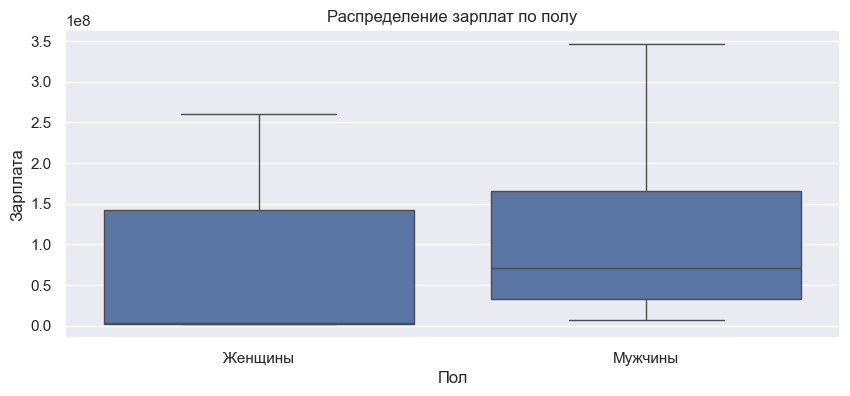

In [87]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='sex', y='salary', data=data)
plt.xticks([0, 1], ['Женщины', 'Мужчины'])
plt.title('Распределение зарплат по полу')
plt.xlabel('Пол')
plt.ylabel('Зарплата')
plt.show()

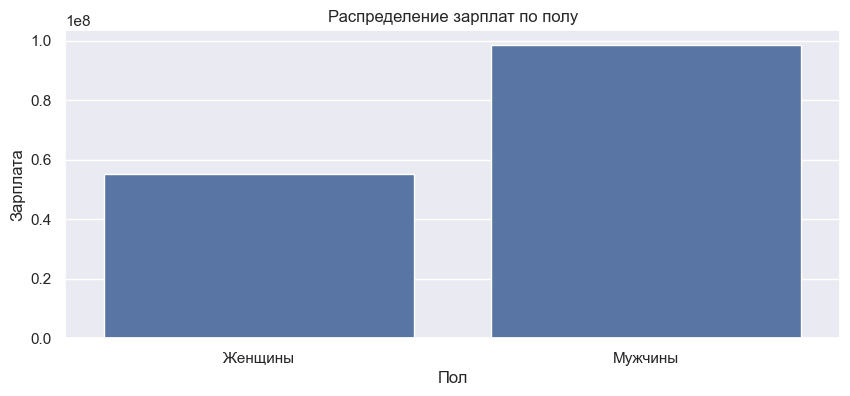

In [90]:
plt.figure(figsize=(10, 4))
sns.barplot(x='sex', y='salary', data=data, errorbar=None)
plt.xticks([0, 1], ['Женщины', 'Мужчины'])
plt.title('Распределение зарплат по полу')
plt.xlabel('Пол')
plt.ylabel('Зарплата')
plt.show()

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

<div class="alert alert-warning">
    
* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


<div class="alert alert-warning">
    
* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - составьте матрицу смежности, она выглядит примерно вот так:


In [ ]:
# ******  был в браке | не был в браке |
# мужчины      140    |      499       |
# женщины      241    |      298       |